In [1]:
import os

# Walk through  directory and list number of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/lungs-disease-dataset-4-types"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 1 directories and 0 images in '/kaggle/input/lungs-disease-dataset-4-types'.
There are 3 directories and 0 images in '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset'.
There are 5 directories and 0 images in '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val'.
There are 0 directories and 406 images in '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Tuberculosis'.
There are 0 directories and 401 images in '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Bacterial Pneumonia'.
There are 0 directories and 406 images in '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Corona Virus Disease'.
There are 0 directories and 402 images in '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Normal'.
There are 0 directories and 401 images in '/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/Viral Pneumonia'.
There are 5 directories and 0 images in '/kagg

In [2]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder

In [3]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Bacterial Pneumonia' 'Corona Virus Disease' 'Normal' 'Tuberculosis'
 'Viral Pneumonia']


In [4]:
class_labels = ['Bacterial Pneumonia', 'Corona Virus Disease', 'Normal', 'Tuberculosis', 'Viral Pneumonia']

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



Image shape: (824, 1024)


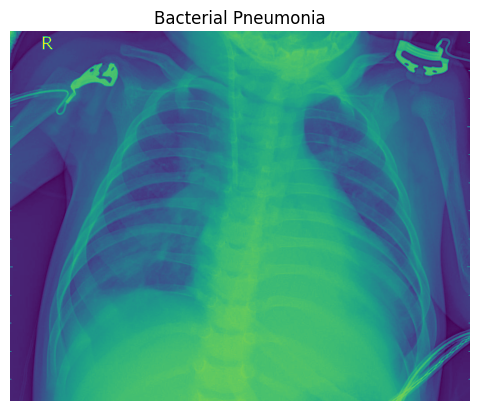

In [6]:
img = view_random_image(target_dir="/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train/",
                        target_class="Bacterial Pneumonia")

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"
valid_dir = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/"
test_dir = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(128, 128), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(128, 128),
                                               class_mode="categorical",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(128, 128),
                                               class_mode="categorical",
                                               shuffle=False,
                                               seed=42)


Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D

model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,587,141 (128.12 MB)

 Trainable params: 33,586,949 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [9]:
history = model.fit(
    train_data,
    epochs=5,  # You can adjust the number of epochs
    validation_data=valid_data
)


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


190/190 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.5552 - loss: 12.4841 - val_accuracy: 0.3259 - val_loss: 13.8057
Epoch 2/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.7320 - loss: 0.6803 - val_accuracy: 0.4196 - val_loss: 7.2758
Epoch 3/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.7765 - loss: 0.5728 - val_accuracy: 0.6210 - val_loss: 1.9173
Epoch 4/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.7907 - loss: 0.5392 - val_accuracy: 0.7629 - val_loss: 0.9171
Epoch 5/5
190/190 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.7977 - loss: 0.4961 - val_accuracy: 0.7436 - val_loss: 0.7214


In [10]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 730ms/step - accuracy: 0.7913 - loss: 0.6940
Test Loss: 0.7308872938156128, Test Accuracy: 0.750617265701294


In [11]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

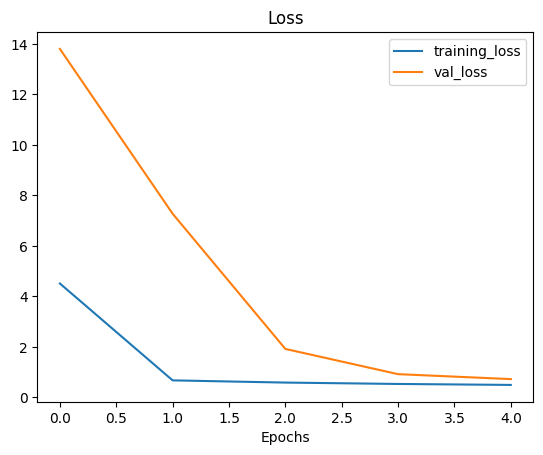

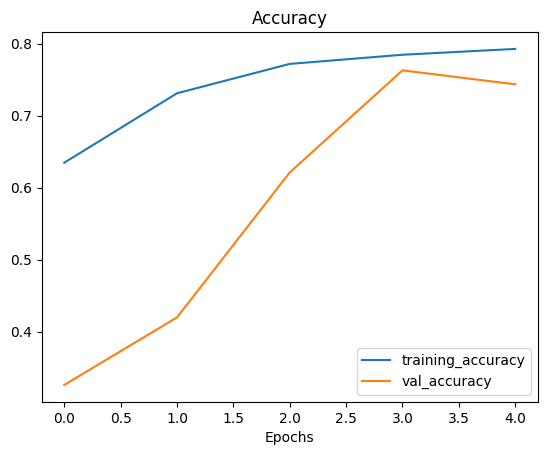

In [12]:
plot_loss_curves(history)

In [13]:
model.save('Respiratory.h5')

In [14]:
def load_and_prep_image(filename, img_shape=128):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img / 255.

    # Add batch dimension (model expects shape (batch_size, height, width, channels))
    img = tf.expand_dims(img, axis=0)
    
    return img


In [15]:
test = load_and_prep_image(r"/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test/Normal/018.jpeg")


In [16]:
import tensorflow as tf
# Your class labels
class_labels = ['Bacterial Pneumonia', 'Corona Virus Disease', 'Normal', 'Tuberculosis', 'Viral Pneumonia']

saved_model = tf.keras.models.load_model('/kaggle/working/Respiratory.h5')

# Make a prediction on our custom image
prediction=saved_model.predict(test)
predicted_class = np.argmax(prediction, axis=-1)

# Map the predicted class index to the class label
predicted_class_label = class_labels[predicted_class[0]]

print(f"Predicted class: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted class: Normal


In [17]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions for the test dataset
y_pred_probs = model.predict(test_data)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)       # Convert probabilities to class predictions

# Get true labels
y_true = test_data.classes  # True labels

# Class labels (use test_data.class_indices to map indices to class names if needed)
class_labels = list(test_data.class_indices.keys())

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
print(report)

64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 462ms/step
                      precision    recall  f1-score   support

 Bacterial Pneumonia     0.5686    0.7916    0.6618       403
Corona Virus Disease     0.9381    0.7813    0.8525       407
              Normal     0.9547    0.7302    0.8275       404
        Tuberculosis     0.8012    0.9779    0.8808       408
     Viral Pneumonia     0.5943    0.4690    0.5243       403

            accuracy                         0.7506      2025
           macro avg     0.7714    0.7500    0.7494      2025
        weighted avg     0.7719    0.7506    0.7500      2025



Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━

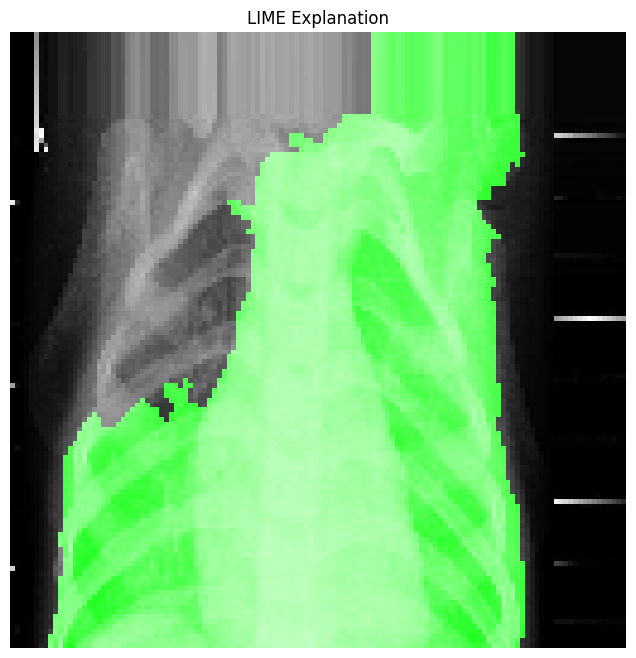

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from lime import lime_image
import matplotlib.pyplot as plt

# Set the seed
tf.random.set_seed(42)

# Directories
train_dir = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/train"
valid_dir = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/val/"
test_dir = "/kaggle/input/lungs-disease-dataset-4-types/Lung Disease Dataset/test"

# Image size and batch size
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(train_dir, batch_size=BATCH_SIZE, target_size=IMAGE_SIZE, class_mode="categorical", seed=42)
valid_data = datagen.flow_from_directory(valid_dir, batch_size=BATCH_SIZE, target_size=IMAGE_SIZE, class_mode="categorical", seed=42)
test_data = datagen.flow_from_directory(test_dir, batch_size=BATCH_SIZE, target_size=IMAGE_SIZE, class_mode="categorical", seed=42)

# Load pre-trained model
saved_model = tf.keras.models.load_model('/kaggle/working/Respiratory.h5')

# LIME explainer setup
explainer = lime_image.LimeImageExplainer()

# Get a single image and its true label from the test set
x_test, y_test = next(test_data)
image = x_test[0]  # Take the first image in the batch

# Define the predict function for LIME
def predict_fn(images):
    return saved_model.predict(images)  # LIME will handle scaling automatically

# Explain the model's prediction on the selected image
explanation = explainer.explain_instance(image.astype('double'), predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Visualize the explanation for the top predicted class
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)

# Display the mask overlaid on the image
plt.figure(figsize=(8, 8))
plt.imshow(temp)
plt.axis('off')
plt.title("LIME Explanation")
plt.show()
